# Chapter 4

In [2]:
# data manipulation
import pandas as pd
import numpy as np

# Viz
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Get web files
import zipfile
from urllib.request import urlretrieve
from io import StringIO

In [3]:
url = 'https://assets.datacamp.com/production/repositories/3202/datasets/eb6a32ed7e5faa4c4b237ab8afb94df55bb4b3a5/chapter_4.zip'
file = 'chapter_4.zip'

urlretrieve(url, file)

zip_ref = zipfile.ZipFile(file, 'r')
zip_ref.extractall('./')
zip_ref.close()

In [15]:
datamart_normalized = pd.read_csv('datamart_normalized_df.csv', index_col='CustomerID')
datamart_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3643 entries, 12747 to 18287
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Recency        3643 non-null   float64
 1   Frequency      3643 non-null   float64
 2   MonetaryValue  3643 non-null   float64
dtypes: float64(3)
memory usage: 113.8 KB


In [16]:
# Import KMeans 
from sklearn.cluster import KMeans

# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(datamart_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

In [17]:
datamart_rfm = pd.read_csv('datamart_rfm.csv', index_col='CustomerID')
datamart_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3643 entries, 12747 to 18287
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Recency        3643 non-null   int64  
 1   Frequency      3643 non-null   int64  
 2   MonetaryValue  3643 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 113.8 KB


In [18]:
# Create a DataFrame by adding a new cluster label column
datamart_rfm_k3 = datamart_rfm.assign(Cluster=cluster_labels)

# Group the data by cluster
grouped = datamart_rfm_k3.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         164.6       3.1          53.5  1180
1          15.7      50.3        1059.3   889
2          77.1      12.6         219.5  1574

In [24]:
data_str = ',var1,var2,var3\n0,137,0.499,992.118\n1,335,9.292,0.111\n2,172,243.805,0.09\n3,745,4.002,425.405\n4,244,13.347000000000001,0.028999999999999998\n5,229,0.006,0.11199999999999999\n6,683,0.095,0.8370000000000001\n7,608,2.385,0.171\n8,490,15.831,0.124\n9,381,35.008,136.60500000000002\n10,278,26.604,0.174\n11,376,0.162,1.511\n12,354,29.204,0.068\n13,457,0.147,0.39399999999999996\n14,568,0.122,10.309000000000001\n15,352,0.991,0.816\n16,590,3.858,0.23199999999999998\n17,768,0.643,0.001\n18,498,34.681,1.0339999999999998\n19,662,0.198,0.017\n20,680,0.141,1.463\n21,315,14.526,70.709\n22,603,0.23199999999999998,0.024\n23,578,3.155,0.005\n24,186,0.68,0.33899999999999997\n25,241,1.064,5.282\n26,493,0.506,0.001\n27,107,127.01,0.027000000000000003\n28,419,0.6,0.014\n29,634,63.193000000000005,2.435\n30,413,7.3420000000000005,0.594\n31,613,0.249,3.535\n32,416,0.13699999999999998,11.47\n33,309,1.2670000000000001,0.18600000000000003\n34,364,83.895,17.407\n35,753,0.605,0.092\n36,727,0.6579999999999999,0.004\n37,531,0.027000000000000003,2.267\n38,733,1.135,0.094\n39,556,0.016,1.598\n40,642,0.033,411.336\n41,171,1.217,0.001\n42,487,0.098,3.988\n43,554,0.541,5.909000000000002\n44,661,0.081,0.27399999999999997\n45,413,1.064,0.46799999999999997\n46,615,0.078,0.16699999999999998\n47,597,0.134,0.121\n48,143,0.49700000000000005,0.001\n49,688,0.634,0.017\n50,126,0.006999999999999999,91.096\n51,436,69.082,96.17399999999999\n52,721,20.423,2.106\n53,397,0.28,1.713\n54,566,14.659,0.001\n55,115,0.075,0.11900000000000001\n56,164,0.038,0.011000000000000001\n57,296,158.757,1.484\n58,125,0.311,0.006\n59,467,58.607,2.622\n60,571,0.006,1679.714\n61,382,0.073,0.043\n62,765,0.341,0.217\n63,716,1.3090000000000002,1.0579999999999998\n64,122,0.102,4.8690000000000015\n65,226,2.59,0.001\n66,379,0.085,0.31\n67,481,0.026000000000000002,3.835\n68,456,0.41,0.22\n69,255,0.624,0.8390000000000001\n70,413,0.53,204.145\n71,695,0.521,14.251\n72,266,0.642,0.015\n73,748,4.532,27.988000000000003\n74,388,0.08,0.012\n75,518,0.18,9.899\n76,379,6.649,48.787\n77,755,25.825,1.24\n78,187,0.496,160.704\n79,343,61.63399999999999,0.696\n80,448,0.075,0.536\n81,686,1.235,1.802\n82,290,1.08,0.001\n83,402,0.045,19002.04\n84,251,0.055999999999999994,0.275\n85,795,0.7440000000000001,0.003\n86,421,0.145,0.001\n87,469,5.899,0.355\n88,353,0.318,1.0139999999999998\n89,561,0.067,0.32299999999999995\n90,664,1.399,0.182\n91,569,6.626,1.945\n92,554,2.786,4.1930000000000005\n93,614,16.813,0.009999999999999998\n94,688,22.273000000000003,19.546000000000006\n95,249,0.092,0.254\n96,363,91.77,0.068\n97,177,1.5430000000000001,16.125999999999998\n98,175,3.762,13.537\n99,432,0.09300000000000001,0.014\n'
data = pd.read_csv(StringIO(data_str), index_col=0)

scaler = StandardScaler()
scaler.fit(data)
data_normalized = scaler.transform(data)
data_normalized.shape

(100, 3)

In [25]:
sse = dict()

# Fit KMeans and calculate SSE for each k
for k in range(1, 21):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(data_normalized)
    
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_

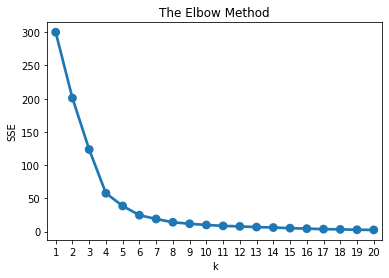

In [28]:
# Add the plot title "The Elbow Method"
plt.title('The Elbow Method')

# Add X-axis label "k"
plt.xlabel('k')

# Add Y-axis label "SSE"
plt.ylabel('SSE')

# Plot SSE values for each key in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [32]:
datamart_normalized = datamart_normalized.assign(Cluster=cluster_labels)

In [34]:
# Melt the normalized dataset and reset the index
datamart_melt = pd.melt(
                    datamart_normalized.reset_index(), 
                        
# Assign CustomerID and Cluster as ID variables
                    id_vars=['CustomerID', 'Cluster'],

# Assign RFM values as value variables
                    value_vars=['Recency', 'Frequency', 'MonetaryValue'], 
                        
# Name the variable and value
                    var_name='Metric', value_name='Value'
					)

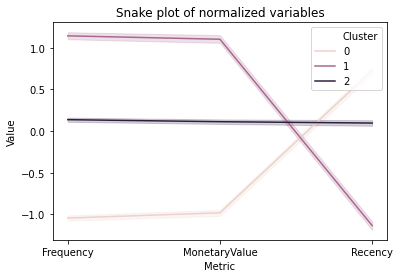

In [36]:
# Add the plot title
plt.title('Snake plot of normalized variables')

# Add the x axis label
plt.xlabel('Metric')

# Add the y axis label
plt.ylabel('Value')

# Plot a line for each value of the cluster variable
sns.lineplot(data=datamart_melt, x='Metric', y='Value', hue='Cluster')
plt.show()

In [40]:
datamart_rfm_k3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3643 entries, 12747 to 18287
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Recency        3643 non-null   int64  
 1   Frequency      3643 non-null   int64  
 2   MonetaryValue  3643 non-null   float64
 3   Cluster        3643 non-null   int32  
dtypes: float64(1), int32(1), int64(2)
memory usage: 288.1 KB


In [43]:
# Calculate average RFM values for each cluster
cluster_avg = datamart_rfm_k3.groupby(['Cluster']).mean() 

# Calculate average RFM values for the total customer population
population_avg = datamart_rfm.mean()

# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1

# Print relative importance scores rounded to 2 decimals
print(relative_imp.round(2))

         Recency  Frequency  MonetaryValue
Cluster                                   
0           0.82      -0.84          -0.86
1          -0.83       1.69           1.86
2          -0.15      -0.33          -0.41


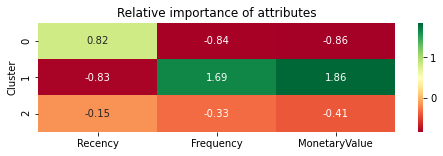

In [48]:
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(8, 2))

# Add the plot title
plt.title('Relative importance of attributes')

# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

In [49]:
datamart_rfmt = pd.read_csv('datamart_rfmt.csv', index_col='CustomerID')
datamart_rfmt

,Recency,Frequency,MonetaryValue,Tenure
CustomerID,,,,
12747,3,25,948.70,362
12748,1,888,7046.16,365
12749,4,37,813.45,214
12820,4,17,268.02,327
12822,71,9,146.15,88
...,...,...,...,...
18280,278,2,38.70,278
18281,181,2,31.80,181
18282,8,2,30.70,8


In [52]:
# Import StandardScaler 
from sklearn.preprocessing import StandardScaler

# Apply log transformation
datamart_rfmt_log = np.log(datamart_rfmt_log)

# Initialize StandardScaler and fit it 
scaler = StandardScaler(); scaler.fit(datamart_rfmt)

# Transform and store the scaled data as datamart_rfmt_normalized
datamart_rfmt_normalized = scaler.transform(datamart_rfmt)

<ipython-input-52-822b2b84a55f>:5: RuntimeWarning: divide by zero encountered in log
  datamart_rfmt_log = np.log(datamart_rfmt_log)
<ipython-input-52-822b2b84a55f>:5: RuntimeWarning: invalid value encountered in log
  datamart_rfmt_log = np.log(datamart_rfmt_log)


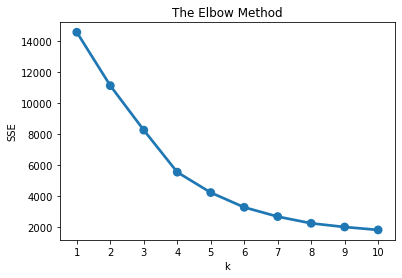

In [57]:
sse = {}

# Fit KMeans and calculate SSE for each k between 1 and 10
for k in range(1, 11):
  
    # Initialize KMeans with k clusters and fit it 
    kmeans = KMeans(n_clusters=k, random_state=1).fit(datamart_rfmt_normalized)
    
    # Assign sum of squared distances to k element of the sse dictionary
    sse[k] = kmeans.inertia_   

# Add the plot title, x and y axis labels
plt.title('The Elbow Method'); plt.xlabel('k'); plt.ylabel('SSE')

# Plot SSE values for each k stored as keys in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [59]:
# Import KMeans 
from sklearn.cluster import KMeans

# Initialize KMeans
kmeans = KMeans(n_clusters=4, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(datamart_rfmt_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

In [60]:
# Create a new DataFrame by adding a cluster label column to datamart_rfmt
datamart_rfmt_k4 = datamart_rfmt.assign(Cluster=cluster_labels)

# Group by cluster
grouped = datamart_rfmt_k4.groupby(['Cluster'])

# Calculate average RFMT values and segment sizes for each cluster
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'Tenure': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue Tenure      
           mean      mean          mean   mean count
Cluster                                             
0          36.7      32.3         602.5  295.7  1363
1         237.2       6.0         108.7  263.7   897
2          48.4       9.5         146.7   78.9  1368
3          22.8     380.8       15403.0  327.2    15